Fourier Transform is one of the most famous tools in signal processing and analysis of time series. The Fast Fourier Transform (FFT) is the practical implementation of the Fourier Transform on Digital Signals. FFT is considered one of the top 10 algorithms with the greatest impact on science and engineering in the 20th century [**[1]**](https://doi.ieeecomputersociety.org/10.1109/MCISE.2000.814652). In this notebook, a practical approach to FFT has been discussed as how to use it to represent the frequency domain (spectrum) of the signal data and plot the spectrum using Plotly to give us more interactivity and a better understanding of the features in the spectrum. By the end of this notebook, we'll build a class to analyze the signal. An ECG signal and its spectrum have been provided as a final example.

# **Introduction**

Fourier Transform (FT) relates the time domain of a signal to its frequency domain, where the frequency domain contains the information about the sinusoids (amplitude, frequency, phase) that construct the signal. Since FT is a continuous transform, the Discrete Fourier Transform (DFT) becomes the applicable transform in the digital world that holds the information of signals in the discrete format as a set of samples, where the sampling theorem is the strict rule of discretizing and the signal. The DFT of a signal $(x_n)$ with $N$ number of samples is given by the following equation [**[2]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html):


$$X_k=\sum_{n=0}^{N-1} x_n⋅e^{−i2\pi kn/N}=\sum_{n=0}^{N−1}x_n[cos(2\pi kn/N)−i⋅sin(2\pi kn/N)]$$


**Where:**
- $N$ : Number of samples
- $n$ : Current sample
- $k$ : Current frequency where $k \in [0, N-1]$
- $x_n$ : The sine value at sample n
- $X_k$ : The DFT which include in information of both amplitude and phase

The output of the DFT $(X_k)$ is an array of complex numbers that hold the information of frequency components [**[2]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html).
Applying DFT on signals using the mathematical equation directly demands a heavy computation complexity. Luckily, a Fast Fourier Transform (FFT) was developed [**[3]**](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/) to provide a faster implementation of the DFT. The FFT takes advantage of the symmetry nature of the output of the DFT.
We will not further discuss how FFT works but if you want more details, refer to [**[3]**](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/).




# **Let's Code:**
We will start simply to understand the inputs and outputs of each method we use in this post. First, we will import the required packages. Numpy is for dealing with matrices and calculations. We import the methods that help us with the calculations related to Fourier Analysis from scipy.fft module (fft, rfft, fftfreq, rfftfreq). Finally, Plotly and matplotlib are for visualization.

### **Let's get started...**

In [ ]:
# Import the required packages
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

We need signals to try our code on. Sinusoids are great and fit to our examples. In the next code, we generate a sinusoidal signal using a class named Signal, which you can find ready to use following this [**GitHub gist**](https://gist.github.com/OmarAlkousa/4bd0bacb0ff976be4105777965854e06).

In [ ]:
# Building a class Signal for better use in generating sinusoidal signals.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.

  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.

    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal

    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal

    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

The signal we will generate using the previous class contains three sinusoids (1, 10, 20) Hz with amplitudes of (3, 1, 0.5), respectively. The sampling rate will be 200 and the duration of the signal is 2 seconds.

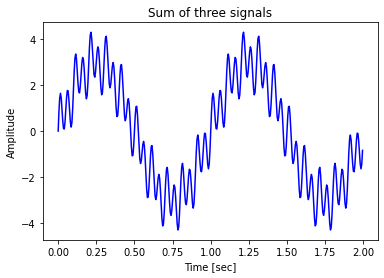

In [ ]:
# Generate the three signals using Signal class and its method sine()
signal_1hz = Signal(amplitude=3, frequency=1, sampling_rate=200, duration=2)
sine_1hz = signal_1hz.sine()
signal_20hz = Signal(amplitude=1, frequency=20, sampling_rate=200, duration=2)
sine_20hz = signal_20hz.sine()
signal_10hz = Signal(amplitude=0.5, frequency=10, sampling_rate=200, duration=2)
sine_10hz = signal_10hz.sine()

# Sum the three signals to output the signal we want to analyze
signal = sine_1hz + sine_20hz + sine_10hz

# Plot the signal
plt.plot(signal_1hz.time_axis, signal, 'b')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('Sum of three signals')
plt.show()

The Fourier Transform of this signal can be calculated using (fft) from the scipy package as follows [**[4]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft):

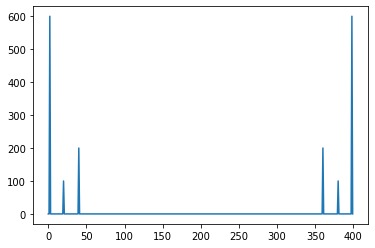

In [ ]:
# Apply the FFT on the signal
fourier = fft(signal)

# Plot the result (the spectrum |Xk|)
plt.plot(np.abs(fourier))
plt.show()

The figure above should represent the frequency spectrum of the signal. Notice that the x-axis is the number of samples (instead of the frequency components) and the y-axis should represent the amplitudes of the sinusoids. To get the actual amplitudes of the spectrum, we have to normalize the output of (fft) by $N/2$ the number of samples.

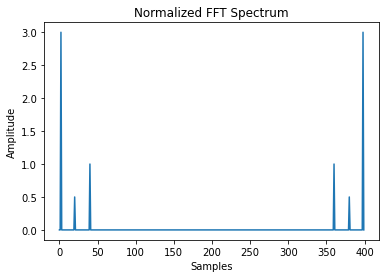

In [ ]:
# Calculate N/2 to normalize the FFT output
N = len(signal)
normalize = N/2

# Plot the normalized FFT (|Xk|)/(N/2)
plt.plot(np.abs(fourier)/normalize)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.title('Normalized FFT Spectrum')
plt.show()

To get the frequency components (x-axis), you can use (fftfreq) from the scipy package. This method needs the number of samples (N) and the sampling rate as input arguments. And it returns a frequency axis with N frequency components [**[5]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq). 

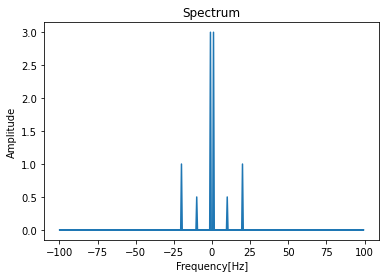

In [ ]:
# Get the frequency components of the spectrum
sampling_rate = 200.0 # It's used as a sample spacing
frequency_axis = fftfreq(N, d=1.0/sampling_rate)
norm_amplitude = np.abs(fourier)/normalize
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

To understand what happened in the last code, let's plot only the frequency axis:

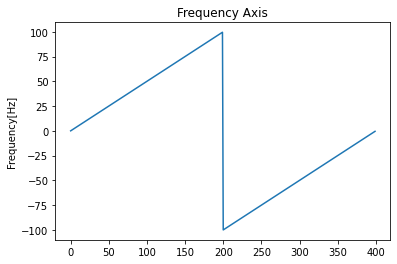

In [ ]:
# Plot the frequency axis for more explanation
plt.plot(frequency_axis)
plt.ylabel('Frequency[Hz]')
plt.title('Frequency Axis')
plt.show()

Notice that the frequency array starts at zero. Then, it begins to increase with (d) step by step to reach its maximum (100Hz). After that, it starts from the negative maximum frequency (-100Hz) to increase back again with (d) step by step. The maximum frequency that can hold information from the signal (100Hz) is half of the sampling rate and this is true according to the Sampling Theorem [**[2]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html).

Due to the symmetry of the spectrum for the real-value signals, we only focus on the first half of the spectrum [**[2]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html).
The Scipy package provides methods to deal with the Fourier transform of the real-value signals, where it takes advantage symmetry nature of the spectrum. Such methods are (rfft [**[6]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html#scipy.fft.rfft), rfftfreq [**[7]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html#scipy.fft.rfftfreq)). These methods are the same as (fft, fftfreq), respectively. By comparing the time execution between (fft) and (rfft) methods on the same signal, you'll find that (rfft) is a little bit faster. When dealing with real-value signals, which is most likely the case, using (rfft) is the best choice.

In [ ]:
print('Execution time of fft function:')
%timeit fft(signal)
print('\nExecution time of rfft function:')
%timeit rfft(signal)

Execution time of fft function:
13.5 µs ± 8.3 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Execution time of rfft function:
12.3 µs ± 3.55 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


To conclude our discussion about scaling the amplitudes and generating the frequency axis of the spectrum for real-values signal data that have a symmetry nature in their frequency domain, the code below represents the final form of the spectrum (the actual amplitudes on the right frequencies).

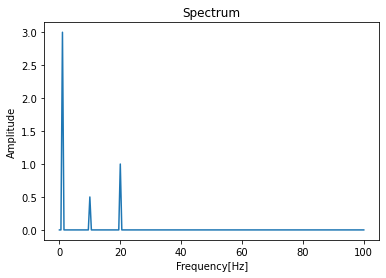

In [ ]:
# Plot the actual spectrum of the signal
plt.plot(rfftfreq(N, d=1/sampling_rate), 2*np.abs(rfft(signal))/N)
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()

The figure below helps you understand and memorize how to get each of the frequency axis and the actual amplitudes of the sinusoids that construct the spectrum.

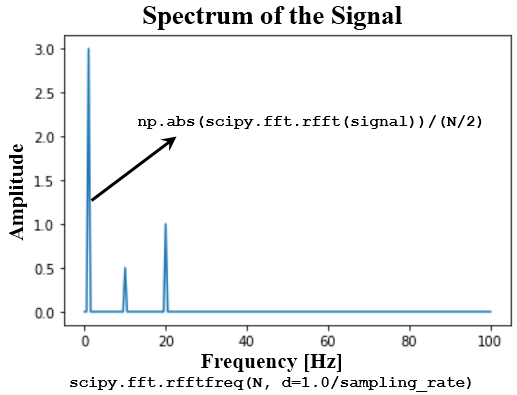

Now that we've understood the inputs and outputs of each method we used in Fourier analysis, let's do our final code. We will build a class (Fourier) to make our use of Fourier Transform more convenient and easier to use. The class we need should calculate the DFT of the signal data and intuitively visualize the data. Make sure to read the documentation of the class to understand the use of this class. If you are not familiar with classes in Python and how to build one, refer to this previous [**post**](https://medium.com/towards-data-science/use-classes-for-generating-signals-6694d22e9a80) about building a class to generate signals.

In [ ]:
# Building a class Fourier for better use of Fourier Analysis.
class Fourier:
  """
  Apply the Discrete Fourier Transform (DFT) on the signal using the Fast Fourier 
  Transform (FFT) from the scipy package.

  Example:
    fourier = Fourier(signal, sampling_rate=2000.0)
  """

  def __init__(self, signal, sampling_rate):
    """
    Initialize the Fourier class.

    Args:
        signal (np.ndarray): The samples of the signal
        sampling_rate (float): The sampling per second of the signal
    
    Additional parameters,which are required to generate Fourier calculations, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.ndarray): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
        duration (float): The duration of the signal in seconds.
        frequencies (numpy.ndarray): The frequency axis to generate the spectrum.
        fourier (numpy.ndarray): The DFT using rfft from the scipy package.
    """
    self.signal = signal
    self.sampling_rate = sampling_rate
    self.time_step = 1.0/self.sampling_rate
    self.duration = len(self.signal)//self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
    self.frequencies = rfftfreq(len(self.signal), d = self.time_step)
    self.fourier = rfft(self.signal)
    
  # Generate the actual amplitudes of the spectrum
  def amplitude(self):
    """
    Method of Fourier

    Returns:
        numpy.ndarray of the actual amplitudes of the sinusoids.
    """
    return 2*np.abs(self.fourier)/len(self.signal)

  # Generate the phase information from the output of rfft  
  def phase(self, degree = False):
    """
    Method of Fourier

    Args:
        degree: To choose the type of phase representation (Radian, Degree).
                By default, it's in radian. 

    Returns:
        numpy.ndarray of the phase information of the Fourier output.
    """
    return np.angle(self.fourier, deg = degree)

  # Plot the spectrum
  def plot_spectrum(self, interactive=False):
    """
    Plot the Spectrum (Frequency Domain) of the signal either using the matplotlib
    package, or plot it interactive using the plotly package.

    Args:
        interactive: To choose if you want the plot interactive (True), or not
        (False). The default is the spectrum non-interactive.

    Retruns:
        A plot of the spectrum.
    """
    # When the argument interactive is set to True:
    if interactive:
      self.trace = go.Line(x=self.frequencies, y=self.amplitude())
      self.data = [self.trace]
      self.layout = go.Layout(title=dict(text='Spectrum',
                                         x=0.5,
                                         xanchor='center',
                                         yanchor='top',
                                         font=dict(size=25, family='Arial, bold')),
                              xaxis=dict(title='Frequency[Hz]'),
                              yaxis=dict(title='Amplitude'))
      self.fig = go.Figure(data=self.data, layout=self.layout)
      return self.fig.show()
    # When the argument interactive is set to False:
    else:
      plt.figure(figsize = (10,6))
      plt.plot(self.frequencies, self.amplitude())
      plt.title('Spectrum')
      plt.ylabel('Amplitude')
      plt.xlabel('Frequency[Hz]')
  
  # Plot the Signal and the Spectrum interactively
  def plot_time_frequency(self, t_ylabel="Amplitude", f_ylabel="Amplitude",
                          t_title="Signal (Time Domain)",
                          f_title="Spectrum (Frequency Domain)"):
    """
    Plot the Signal in Time Domain and Frequency Domain using plotly.

    Args:
        t_ylabel (String): Label of the y-axis in Time-Domain
        f_ylabel (String): Label of the y-axis in Frequency-Domain
        t_title (String): Title of the Time-Domain plot
        f_title (String): Title of the Frequency-Domain plot 

    Returns:
        Two figures: the first is the time-domain, and the second is the
                     frequency-domain.
    """
    # The Signal (Time-Domain)
    self.time_trace = go.Line(x=self.time_axis, y=self.signal)
    self.time_domain = [self.time_trace]
    self.layout = go.Layout(title=dict(text=t_title,
                                       x=0.5,
                                       xanchor='center',
                                       yanchor='top',
                                       font=dict(size=25, family='Arial, bold')),
                            xaxis=dict(title='Time[sec]'),
                            yaxis=dict(title=t_ylabel),
                            width=1000,
                            height=400)
    fig = go.Figure(data=self.time_domain, layout=self.layout)
    fig.show()
    # The Spectrum (Frequency-Domain)
    self.freq_trace = go.Line(x=self.frequencies, y=self.amplitude())
    self.frequency_domain = [self.freq_trace]
    self.layout = go.Layout(title=dict(text=f_title,
                                       x=0.5,
                                       xanchor='center',
                                       yanchor='top',
                                       font=dict(size=25, family='Arial, bold')),
                            xaxis=dict(title='Frequency[Hz]'),
                            yaxis=dict(title=f_ylabel),
                            width=1000,
                            height=400)
    fig = go.Figure(data=self.frequency_domain, layout=self.layout)
    fig.show()

Let's try our class on the signal above. The input arguments are the real-values signal data (Time Domain) and the sampling rate of this signal. 

In [ ]:
# Apply the DFT using the class Fourier
fourier = Fourier(signal, sampling_rate=200)
# Plot the spectrum interactively using the class Fourier
fourier.plot_spectrum(interactive=True)

Visualizing the Time-Frequency domains of the signal helps you understand your data.

In [ ]:
# Plot the time and the frequncy domains of the signal
fourier.plot_time_frequency()

Our final example will be a real-world signal data. We will use the class Fourier to plot the time-frequency domains of an electrocardiogram (ECG). The signal is 5 minutes long of the heart's electrical activity, sampled at 360Hz [**[8]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html#scipy.misc.electrocardiogram).

In [ ]:
# Import the ECG signal from scipy package
from scipy.misc import electrocardiogram
# Built-in ECG signal
ecg = electrocardiogram()
# DFT using the class Fourier
ecg_spectrum = Fourier(signal = ecg, sampling_rate = 360.0)
# Plot the time-frequency domains of the ECG signal
ecg_spectrum.plot_time_frequency(t_title="ECG Signal", f_title="ECG Spectrum",
                                 t_ylabel="Amplitude[mV]")

# **Conclusion**

- We've introduced the Discrete Fourier Transform (DFT) mathematically.
- A step-by-step Fourier Analysis coding was discussed. We started by introducing the Fast Fourier Transform (FFT) and the pythonic implementation of FFT to produce the spectrum of the signals.
- We've introduced the requirements of normalizing the spectrum to give us the actual amplitudes of the sinusoids. Also, we've used one of the scipy.fft helper functions to generate the frequency axis of the spectrum (fftfreq).
- We've pointed out the symmetry nature of the Fourier transform and how the spectrum is symmetric around the sampling frequency. And this is what led us to discuss new methods to deal with real-value signal data (rfft, rfftfreq).
- We've built a class to easier use the Fourier transform and produce the frequency domain of the signals interactively using the Plotly package.

# **References**

[**[1]**](https://doi.ieeecomputersociety.org/10.1109/MCISE.2000.814652) Dongarra, J., & Sullivan, F. (2000). Guest Editors Introduction to the top 10 algorithms. *Computing in Science & Engineering*, 2(01), 22-23.

[**[2]**](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html) Kong, Q., Siauw, T., & Bayen, A. (2020). Fourier Transform. *Python programming and numerical methods: A guide for engineers and scientists* (pp. 415–444). Academic Press.

[**[3]**](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/) Cooley, J. W., & Tukey, J. W. (1965). An algorithm for the machine calculation of complex Fourier series. *Mathematics of computation*, 19(90), 297-301.

[**[4]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html#scipy.fft.fft) Scipy Documentation, API Reference, Discrete Fourier Transforms (scipy.fft.fft). [Accessed on 23/2/2023]

[**[5]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) Scipy Documentation, API Reference, Discrete Fourier Transforms (scipy.fft.fftfreq). [Accessed on 23/2/2023]

[**[6]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html#scipy.fft.rfft) Scipy Documentation, API Reference, Discrete Fourier Transforms (scipy.fft.rfft). [Accessed on 23/2/2023]

[**[7]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html#scipy.fft.rfftfreq) Scipy Documentation, API Reference, Discrete Fourier Transforms (scipy.fft.rfftfreq). [Accessed on 23/2/2023]

[**[8]**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html#scipy.misc.electrocardiogram) Scipy Documentation, API Reference, Miscellaneous routines (scipy.misc.electrocardiogram). [Accessed on 23/2/2023]